In [35]:


import shutil
import sys
import os


import WonderPeaks as WP
from user_inputs import *
from Helper_Functions import *


from WonderPeaks.WonderPeaks4ChIP import *
from WonderPeaks.FilterPeaks import *


/data/Megan/NGS_processing/WonderPeaks


In [36]:
#Initialize your data and genome for WonderPeaks
directory = "/data/Megan/NGS_processing/Example_ChIPseq"
User_inputs_dict = initiate_user_inputs(directory)
designfactors = User_inputs_dict["designfactor"].split(";")

#   coordinate_file (must be gtf format)
# coordinate file will be saved in directory for your references
GTF_file = User_inputs_dict['genome_annotations_path']

# GTF_file
coordinate_file = write_coordinate_file(directory, GTF_file)

In [37]:
# Filter_WonderPeaks will calculate peaks, if not already calculated,
# and filters all peaks for True peaks based on thresholds

FWP = Filter_WonderPeaks(directory, coordinate_file, 
                       designfactors, slope_thresh = 0.01)
#initialization
FWP.metadata_connect()
FWP.make_tagged_factor_rep()
peaks = FWP.make_tagged_factor_rep()


Reading in unfiltered peaks


## Use the result of figure below to determine the parameters for next steps:
1. **score_cut** (int): threshold used to call peaks. Unintuitively, this value should be approximately the median score

2.  **fold_greater** (int): threshold used to detmine the minimum fold_change required to become an exception to the rule that no tagged peak should overlap with an untagged peak

3. **designfactor_value** (str): See table below (run cell to view) and choose one of the **values** in your designfactors in red to proceed.

,designfactors,Value
0,Cell_type,"['Wh', 'Op']"
1,Sample_type,"['untagged_control', 'tagged']"


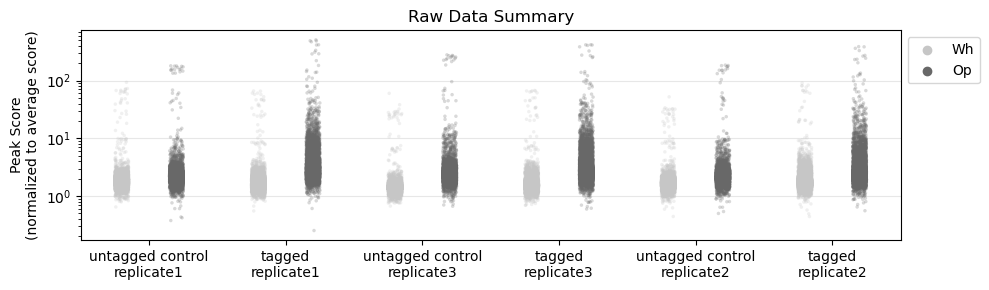

In [38]:

# Convert the dictionary to a DataFrame

designfactor_dict, tagged_factor, other_factor = FWP.get_tag_factor()
df = pd.DataFrame(FWP.get_tag_factor()[0].items(), columns=["designfactors", "Value"])

# Define a function to style rows where Key is not "Key1"
def highlight_row(row):
    if row["designfactors"] == tagged_factor:
        return ["color: grey;" for _ in row]
    if row["designfactors"] != tagged_factor:
        return ["font-weight: bold; color: red;" for val in enumerate(row)]
    
    return [""] * len(row)

# Apply the styling
styled_df = df.style.apply(highlight_row, axis=1)

# Display the styled DataFrame

FWP.plot_raw_results(save = True, figsize_x = 10, figsize_y=3)
styled_df


In [39]:
global designfactor_value
designfactor_value = "Op"
score_cut = 6#5Op #Wh3
fold_greater = 3.5
enrichment_thresh=2


In [40]:
# visually inspect to dermine the score cutoff
data_value, data_filter= FWP.filter_peaks(
                 designfactor_value=designfactor_value, 
                 score_cut = score_cut,
                 fold_greater = fold_greater, 

                 )
data_value
data_filter
data_True = FWP.data_TruePeaks(data_value, data_filter, enrichment_thresh = enrichment_thresh)
peaks2gtf = FWP.Peaks2Annotations(data_True)



In [43]:
FWP.save_data(data_True, data_filter, peaks2gtf, keep_false_pos = True)
FWP.save_data(data_True, data_filter, peaks2gtf, keep_false_pos = False)



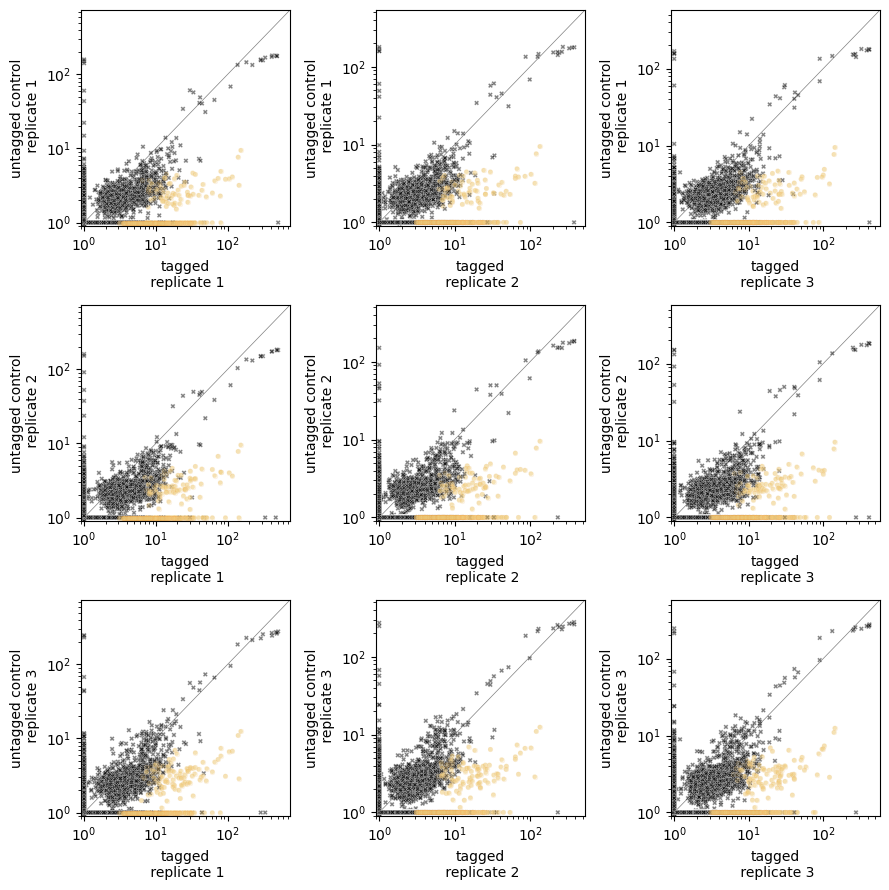

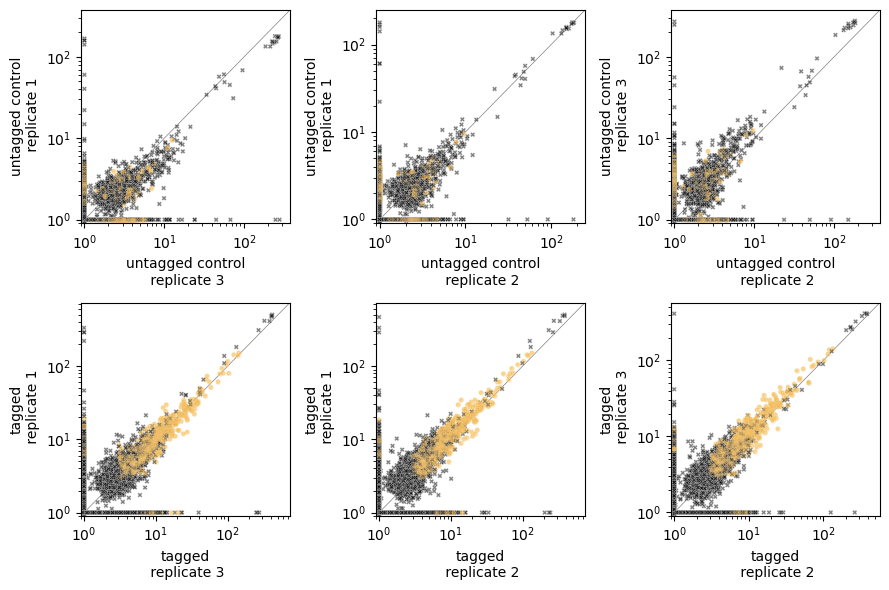

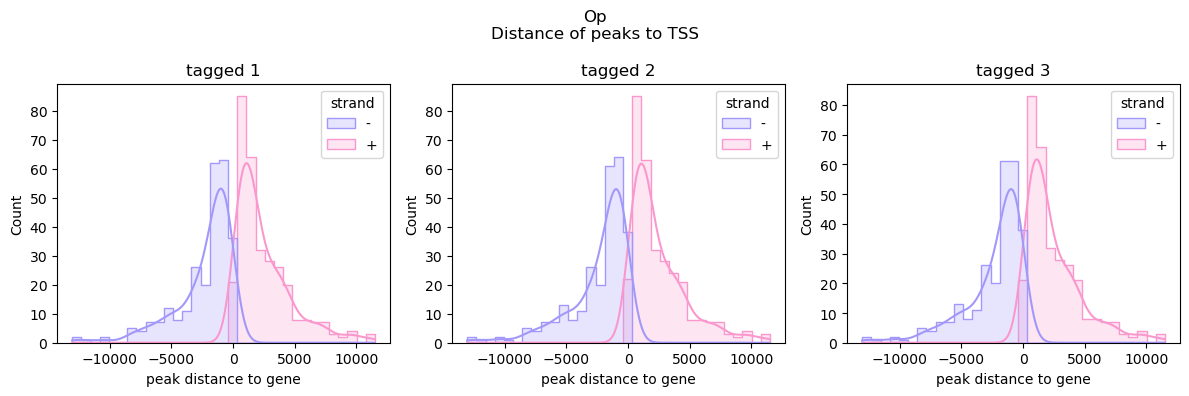

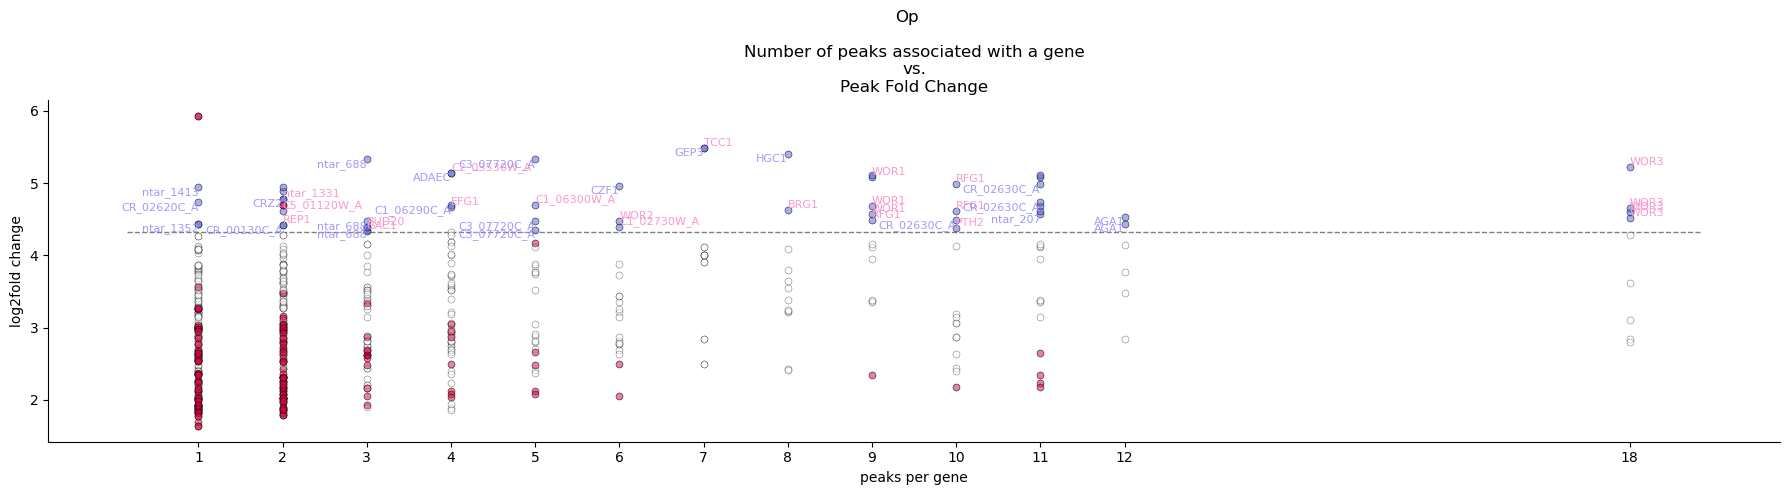

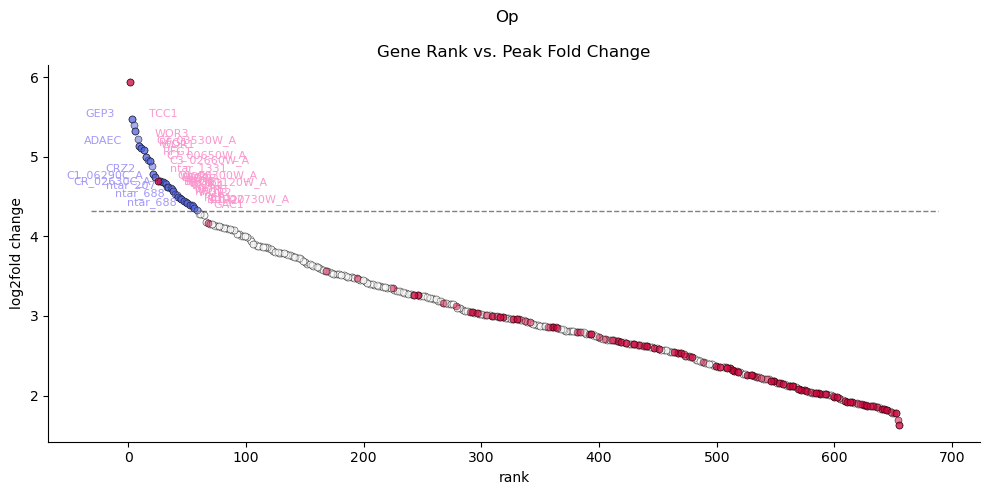

In [44]:
FWP.plot_tVut(data_filter)
FWP.plot_tVt_and_utVut(data_filter)
FWP.summary_dist_to_gene(peaks2gtf, save = True)
FWP.summary_peaks_per_gene(peaks2gtf, text_thresh = 20, save= True, log2 = True)
FWP.summary_ranks(peaks2gtf, text_thresh = 20, save= True, log2 = True)


## Now for the other Cell type

## At this point, use the above result to determine the parameters for next steps:

1. **score_cut** (int): threshold used to call peaks. Unintuitively, this value should be approximately the median score

2.  **fold_greater** (int): threshold used to detmine the minimum fold_change required to become an exception to the rule that no tagged peak should overlap with an untagged peak

3. **designfactor_value** (str): See table below (run cell to view) and choose one of the **values** in your designfactors in red to proceed.

,designfactors,Value
0,Cell_type,"['Wh', 'Op']"
1,Sample_type,"['untagged_control', 'tagged']"


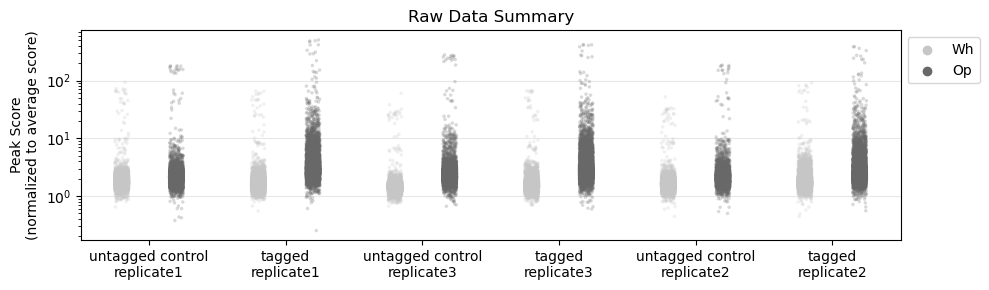

In [45]:

# Convert the dictionary to a DataFrame

designfactor_dict, tagged_factor, other_factor = FWP.get_tag_factor()
df = pd.DataFrame(FWP.get_tag_factor()[0].items(), columns=["designfactors", "Value"])

# Define a function to style rows where Key is not "Key1"
def highlight_row(row):
    if row["designfactors"] == tagged_factor:
        return ["color: grey;" for _ in row]
    if row["designfactors"] != tagged_factor:
        return ["font-weight: bold; color: red;" for val in enumerate(row)]
    
    return [""] * len(row)

# Apply the styling
styled_df = df.style.apply(highlight_row, axis=1)

# Display the styled DataFrame

FWP.plot_raw_results(save = True, figsize_x = 10, figsize_y=3)
styled_df


In [46]:
global designfactor_value
designfactor_value = "Wh"
score_cut = 3 #5Op #Wh3
fold_greater = 2.5 #3
enrichment_thresh = 1.5


In [47]:
# visually inspect to dermine the score cutoff
data_value, data_filter= FWP.filter_peaks(
                 designfactor_value=designfactor_value, 
                 score_cut = score_cut,
                 fold_greater = fold_greater, 
                 )
data_True = FWP.data_TruePeaks(data_value, data_filter, enrichment_thresh = enrichment_thresh)
peaks2gtf = FWP.Peaks2Annotations(data_True)




In [48]:
print(len(data_filter.drop_duplicates(["seqname","peak_location"])))
print(len(data_True.drop_duplicates(["seqname","peak_location"])))
print(len(data_True[data_True["label_false_pos"]].drop_duplicates(["seqname","peak_location"])))
print(len(peaks2gtf.drop_duplicates(["seqname","peak_location"])))
print(len(peaks2gtf[peaks2gtf["label_false_pos"]].drop_duplicates(["seqname","peak_location"])))

16872
28
16
27
15


In [49]:
FWP.save_data(data_True, data_filter, peaks2gtf, keep_false_pos = True)

FWP.save_data(data_True, data_filter, peaks2gtf, keep_false_pos = False)

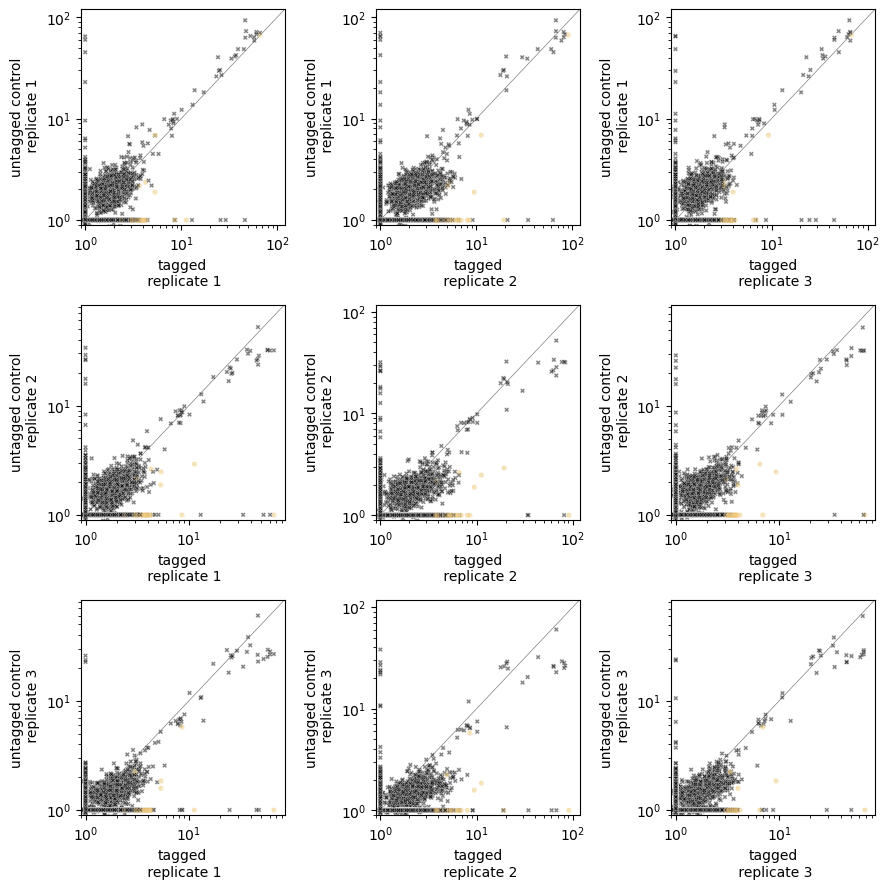

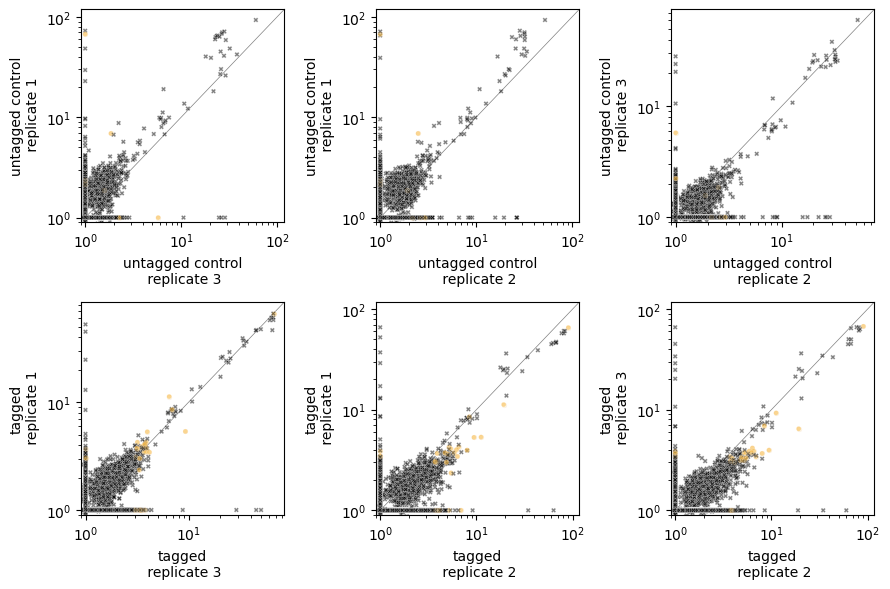

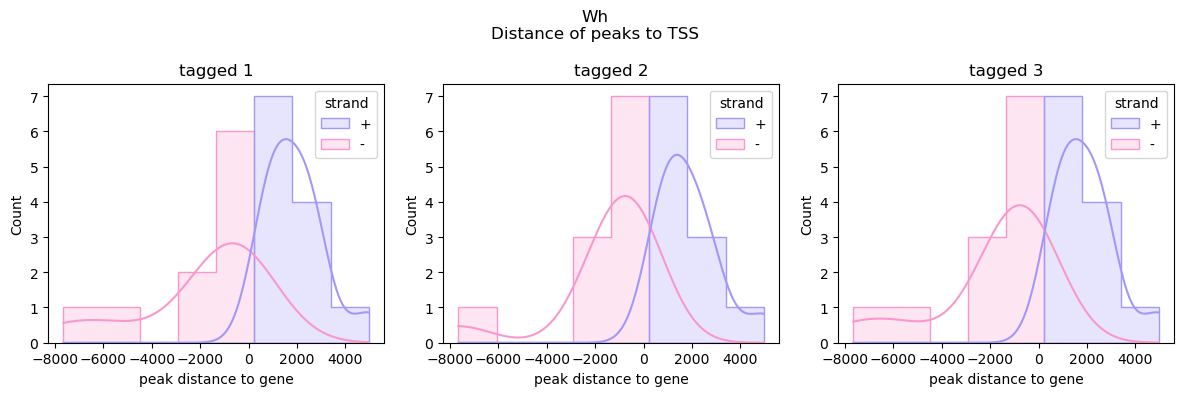

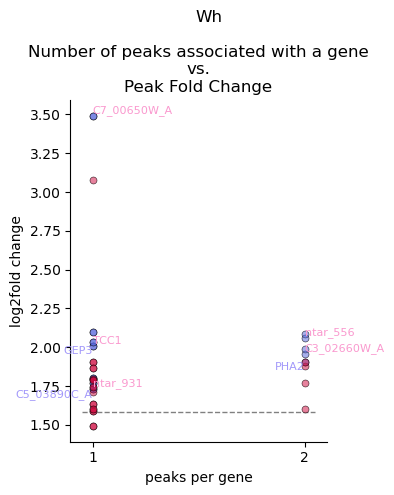

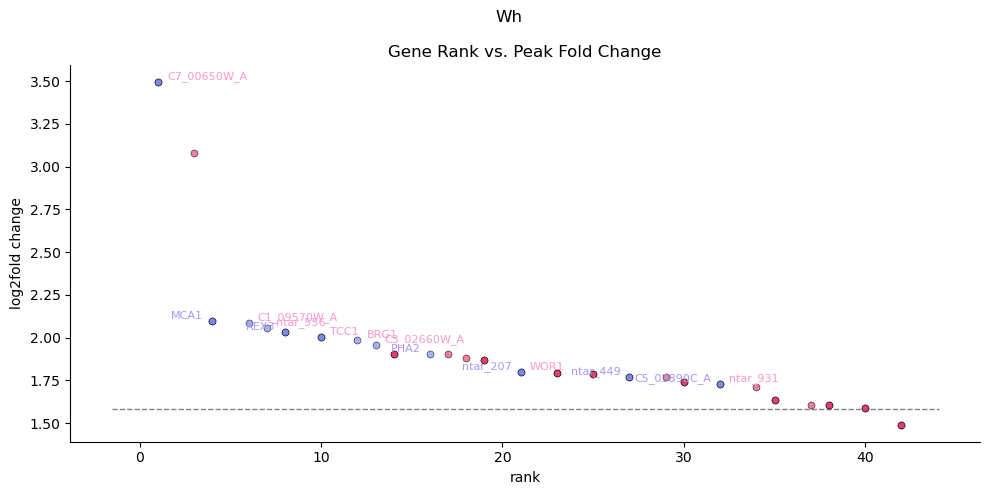

In [50]:
text_thresh = 3
FWP.plot_tVut(data_filter)
FWP.plot_tVt_and_utVut(data_filter)
FWP.summary_dist_to_gene(peaks2gtf, save = True)
FWP.summary_peaks_per_gene(peaks2gtf, text_thresh = text_thresh, save= True)
FWP.summary_ranks(peaks2gtf, text_thresh = text_thresh, save= True)
